# Data visualization

*Authors: Enze Chen and Mark Asta (University of California, Berkeley)*

```{note}
This is an interactive exercise, so you will want to click the {fa}`rocket` and open the notebook in DataHub (or Colab for non-UCB students).
```

## Learning objectives

This notebook contains a series of exercises that introduces data visualization in Python such that, by the end of the lesson, you will be able to:
1. Describe what different visualizations are communicating and their pros and cons.
1. Evaluate when a particular type of visualization is suitable for a particular goal.
1. Use the [matplotlib package](https://matplotlib.org/stable/index.html) to create basic visualizations in Python.

We will progress through most of this exercise together as a group and please interrupt any time you have a question. ❓



## Contents

These exercises are grouped into the following sections:

1. [Intro to data visualization](#Intro-to-data-visualization)
1. [Intro to matplotlib](#Intro-to-matplotlib)
1. [Numerical data](#Numerical-data)
1. [Categorical data](#Categorical-data)
1. [Statistical analyses](#Statistical-analyses)

## Intro to data visualization

[Back to top](#Contents)

Like all the previous sections, before we dive right in, let's think about the following question:

**Pause and reflect**: Why is data visualization an important topic?


### Example

Given that this is a lesson on data _visualization_, it kinda makes sense to just dive right in and _display something_ rather than _say something_.
So here's a plot that may look familiar:

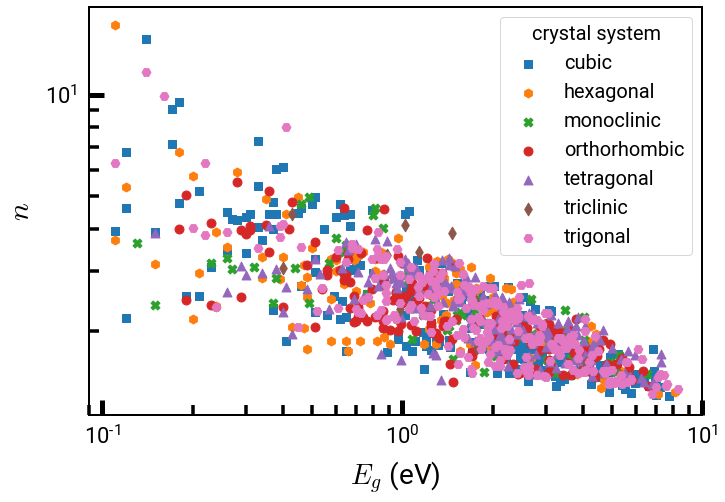

In [1]:
from helper_funcs import *
plot_dielectric_data()

Surprise!
Turns out this plot was made in Python all along. 😜
While we kinda cheated by hiding the details in the above code, you will be able to make a plot just like this one by the end of this lesson.

## Intro to matplotlib

[Back to top](#Contents)

In Python, there are many packages for data visualization, each with their own merits, but the base package that many of them are based off of is [**matplotlib**](https://matplotlib.org/stable/index.html), a software that was originally developed by John Hunter (see [John Hunter, _Computing in Science Engineering_, 2007](https://ieeexplore.ieee.org/document/4160265)) and is now used by thousands of scientists.
It has, in many aspects, become the NumPy equivalent for plotting, and integrates quite well with NumPy arrays and pandas DataFrames.

You might read the name "matplotlib" and think, "Hey, that kinda sounds like MATLAB."
Well, you'd be right, since many aspects of matplotlib were first developed to emulate MATLAB (read Hunter's article to learn more), and the **Pyplot** module was purposely designed to give a MATLAB-like way of plotting.
This allows us to get high-quality graphics (like MATLAB) while obeying Python principles of object-oriented programming (OOP) and being free to use. ✨

To use Pyplot, we write the following:

In [2]:
import matplotlib.pyplot as plt   # standard alias
%matplotlib inline                

In the first line, we import the Pyplot module under the `plt` alias, which is a community standard.

In the second line, we have our first [IPython magic function](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magic-functions), and this one specifically displays our plot outputs directly below the code cell (using the `inline` backend) instead of creating a pop-up window like when running `.py` files.
This backend is **only for Jupyter notebooks** and it will not work if you include it in a `.py` file.

### Create Figure and Axes objects

**Step 1**: There are many ways to create figures using Pyplot, but in true OOP fashion, the **best practice** is to create [`Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) and [`Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) objects using the [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function like so:
```python
fig, ax = plt.subplots()
```

The `Figure` (`fig` variable) is the top-level container for all plot elements while the `Axes` (`ax` variable) is the object for a particular plot (this is _not_ the plural form of the word "axis").
`plt.subplots()` creates both of these objects, which we then assign to the variables on the left.
Imagine this step as the IRL-equivalent of saying, "Before we can paint a painting, we must fetch a new canvas."

**Step 2**: To make a plot, we can call a method like [`ax.plot(x, y)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) **directly using the `Axes` object**—_not_ the `Figure` object or the Pyplot module (unlike MATLAB).
This standard method plots $y$ vs. $x$ points and, by default, connects the points with lines in the order that they're plotted.
Note the syntax for `ax.plot()` is a list (or array) of $x$-coordinates and _then_ a list of $y$-coordinates, **not** a list of $(x,y)$ pairs.

**Step 3**: Finally, and perhaps unintuitively, we have to call [`plt.show()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) to actually display the plot.
Matplotlib can be quite literal!
As we shall soon see, this is also what makes it shine. 💖

----

We've done too much talking, so let's put this into practice!

### Exercise: Write three lines of code to plot $y = x ^ 2$ for the first five positive integers

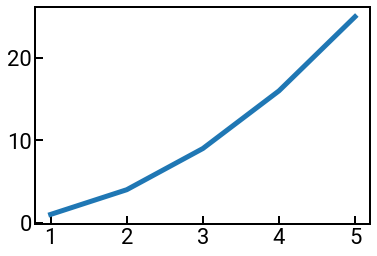

In [3]:
# -------------   WRITE YOUR CODE IN THE SPACE BELOW   ---------- #


### Exercise: Plot $y = \sin(x)$ in the interval $x \in [0, 2\pi]$

_Hint_: Importing `numpy` is a good idea!

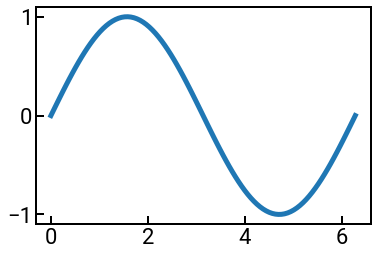

In [4]:
# -------------   WRITE YOUR CODE IN THE SPACE BELOW   ---------- #


### A few stylistic tips

We're off to a great start!
Before we continue further with other plot types, let's discuss a few important features that are currently missing from the above two plots.

**Pause and reflect**: What are some ways we can improve the above plots?



In [5]:
# some blank space - you can take notes here if you want















#### Adding informative labels

Whether it's a title, axes labels, or a legend, plot labels are extremely important!
They can be easily added to an Axes object using built-in methods:

- [`ax.set_title('title_str')`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html): Adds a title to the plot.
- [`ax.set_xlabel('xlabel_str')`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html): Adds a label to the $x$-axis.
- [`ax.set_ylabel('ylabel_str')`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html): Adds a label to the $y$-axis.
- [`ax.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html): Adds a legend to the plot.

**Note**: All of these methods must be called _before_ `plt.show()`.

The first three methods are relatively straightforward as the input argument becomes the label.
If you know $\LaTeX$, it can be rendered if you include it in the string, where `'$E_g$'` will render as $E_g$ like in the first plot.

The last method `ax.legend()` will display a legend with labels **only** for plot elements that have labels assigned to them.
To assign a label to a plot element, add `label='legend_str'` in the input arguments to the `ax.plot()` method.

#### Adding more elements to the plot

If you want to add more plot elements (lines, points, etc.) to the plot, that can easily be done with more calls to `ax.plot()`.
These lines will be added with a different color in [the color cycle](https://matplotlib.org/stable/users/dflt_style_changes.html#colors-color-cycles-and-colormaps) and they **will not replace** previous lines.
This is _different_ behavior than in MATLAB, where you have to type `hold on` to put multiple curves on the same plot.
Hopefully this is a welcome change. 🙂

Example:
```python
ax.plot(x, y1, label='sin(x)')   # plots y1 = sin(x) in blue
ax.plot(x, y2, label='cos(x)')   # plots y2 = cos(x) in orange; y1 is still there!
```

#### Improving visibility

**Step 1**: Perhaps one of your first criticisms of the demo plots was that they're too small!
This can be easily fixed by adding `figsize=(width, height)` as an input argument to `plt.subplots()`, where `width` and `height` are numbers representing "inches." 
We recommend **enlarging your plots** to `(8, 6)` to start with, and adjust based on personal preference.

**Step 2**: Another improvement to plot visibility is increasing the thickness of your lines.
To change this, add a `linewidth=width` parameter to your call to `ax.plot()`, where `width` is a number.
We recommend a line width of **at least `4`**, which you can assign to a `CONSTANT` variable

**Step "3"**: Finally, you'll notice that if you _only_ increase the size of your figure, then the font size remains small.
To increase the font size, you have to add `fontsize=size` to _every function call that adds text_ to your plot.
For example:
```python
ax.set_title('my title', fontsize=size)
```
We recommend a font size of **at least `20`**.
If this seems cumbersome, that's because it is—we'll discuss a better option in the next lesson.

**Step 3.5**: This is very subtle, but you'll notice that the $x$- and $y$-ticks are _also_ labeled, but you never called a function to label them(!), which means their font needs to be increased in a different way.
To do this, we use the [`ax.tick_params()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html) method like so:
```python
ax.tick_params(labelsize=size)    # note the different keyword!
```
The documentation reveals that this method is quite flexible, but we can just use the other default options for now, which includes changing the label size for both $x$ and $y$ axes.

### Exercise: plot $y_1 = \sin(x)$ and $y_2 = \cos(x)$ with these improvements below

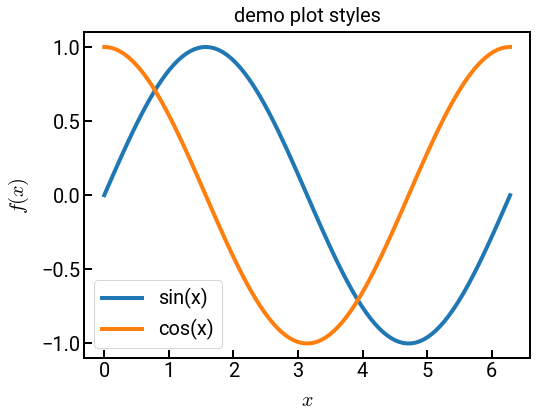

In [6]:
import numpy as np
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
FONTSIZE = 20    # you can change these to your liking!
LINEWIDTH = 4
# -------------   WRITE YOUR CODE IN THE SPACE BELOW   ---------- #


## Numerical data

[Back to top](#Contents)

So far we've discussed how to make line plots, which give you the ability to plot curves, functions, etc., which already covers a lot!
There is another, related type of plot of numerical data that we want to briefly discuss, and that is a **scatter plot** like the very first figure in this notebook.
To create a scatter plot in matplotlib, we can use the [`ax.scatter(x, y)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) method akin to `ax.plot(x, y)`.
The nice part of plotting in matplotlib is that we can swap out the plotting method but keep a lot of the other methods unchanged!

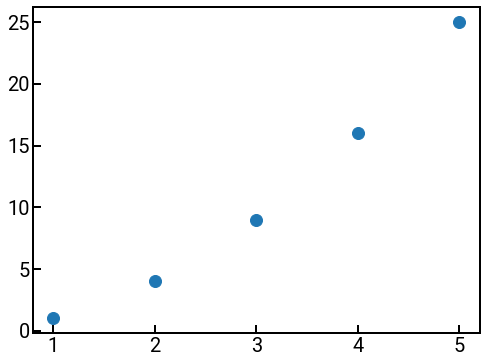

In [7]:
import numpy as np
x = np.arange(1, 6)
y = x ** 2

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)   # note how this was the only thing that had to change...
ax.tick_params(labelsize=FONTSIZE)
plt.show()

Hmm, while the points seem OK, we can probably do better.
In matplotlib language, the individual plot points themselves are called **markers**, so there's a couple of things we can do to customize the markers:

**Step 1**: The most obvious thing is we need to **increase the marker size**. 
There is an `s` parameter that can be a single number or an array of the same length as the number of points to set the size of each individual marker.
For scatter plots, we have to make this number pretty large (e.g., `100`).

**Step 2**: We can also **change the marker color** using the `c` parameter, which like the size, can be a single color or an array of colors for each marker.
In terms of color choices, there are several options! 
You can use a [named color](https://matplotlib.org/stable/gallery/color/named_colors.html), a [cycler notation](https://matplotlib.org/stable/users/dflt_style_changes.html#colors-color-cycles-and-colormaps), or any hex code (see [here](https://htmlcolorcodes.com/color-picker/) for a color picker).

**Step 3**: We can also **change the marker style** using the `marker` parameter, which takes a string symbol that represents the marker. 
A list of all possible marker styles can be found in [the documentation](https://matplotlib.org/stable/api/markers_api.html).
The default is `'o'`.

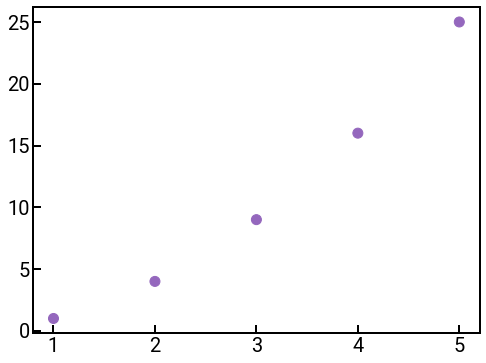

In [8]:
import numpy as np
x = np.arange(1, 6)
y = x ** 2

# some custom settings! Feel free to experiment
marker_size = 100
colors = ['tab:purple' for i in range(5)]
marker_symbol = 'o'

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, s=marker_size, c=colors, marker=marker_symbol)
ax.tick_params(labelsize=FONTSIZE)
plt.show()

## Categorical data

[Back to top](#Contents)

In addition to numerical data, you might also find yourself working with **categorical data** (counts of materials type, crystal structure, etc.), so we will now discuss a canonical plot for categorical data: the **bar chart**.
To make a bar chart in matplotlib, we can use the [`ax.bar(x, height)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html) method that plots bars of height `height` at the positions specified by `x` (`x` can also just be the labels, and Pyplot will space them apart evenly).

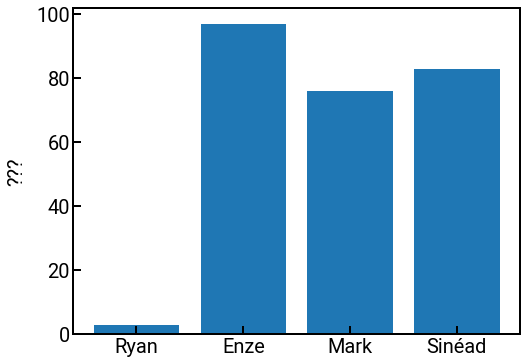

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
mentors = ['Ryan', 'Enze', 'Mark', 'Sinéad']
random_vals = np.random.default_rng().choice(100, size=(4,))   # what'll it be???
ax.bar(x=mentors, height=random_vals)
ax.tick_params(labelsize=FONTSIZE)
ax.set_ylabel('???', fontsize=FONTSIZE)
plt.show()

If you want custom labels for your bars, you can set the `tick_label` parameter in the function call.
For more options and examples, we encourage you to look at the linked documentation up above for inspiration!

### Exercise: create a bar chart of the crystal structure data of the first 50 elements

Remember the data from the first day that mapped element $\rightarrow$ structure?
Recall that the file is located at `'../../assets/data/week_1/01/element_structure.txt'` and is structured as follows:
```
# Data from https://periodictable.com/Properties/A/CrystalStructure.html
Hydrogen Hexagonal
Helium Cubic
Lithium Cubic
Beryllium Hexagonal
...
```

We'll now create a bar chart that counts how many elements belong to each family.
Write some code below to _load in the data_ and then create a bar chart.
Don't forget to add some descriptive labels! 😊

_Hints_:
- 🐼. Don't forget about the power of `sep`!
- Is there a way for us to _count_ the number of occurrences of each _value_ in a DataFrame?
- Recall that we can get all the row labels of a Series/DataFrame with the `.index` attribute.

,Element,Structure
0,Hydrogen,Hexagonal
1,Helium,Cubic
2,Lithium,Cubic
3,Beryllium,Hexagonal
4,Boron,Trigonal


Cubic           24
Hexagonal       14
Orthorhombic     4
Monoclinic       3
Trigonal         2
Tetragonal       2
Triclinic        1
Name: Structure, dtype: int64

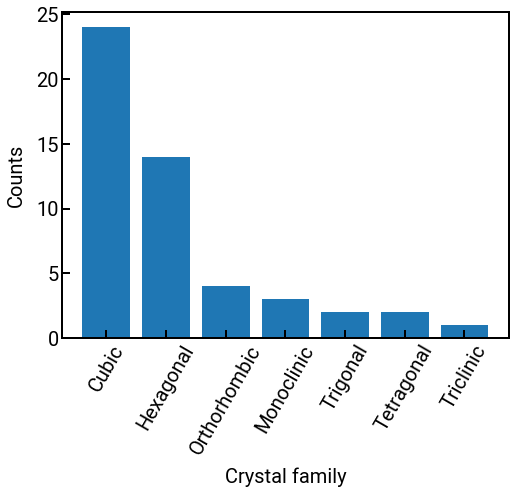

In [10]:
# -------------   WRITE YOUR CODE IN THE SPACE BELOW   ---------- #


Additionally, you may have noticed that the tick labels are running into each other, which makes it pretty unreadable.
There are many ways to fix this, but we'll suggest two here:
- You can rotate the labels by adding the following code:        

```python
for tick in ax.get_xticklabels():
    tick.set_rotation(60)
```

- Or you can plot a _horizontal_ bar chart using the [`ax.barh(x, height)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html) method. 😎

## Statistical analyses

[Back to top](#Contents)

For our final act, we'll show you two more types of plots ([_there are many more_](https://matplotlib.org/stable/tutorials/introductory/sample_plots.html)) that can be generated using matplotlib that may be useful for your self-directed research and future work.

### Histogram

The first is a **histogram**, which can be very helpful for visualizing the distribution of your data.
A histogram **bins** your data into different value ranges and plots the number of data points that fall within each range.
We can plot a histogram using the [`ax.hist(x, bins=None)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html) method, which takes in an array of values `x` and returns
```python
vals, bin_edges, patches = ax.hist(x, bins=nbins)
```
where

- `vals`: The values of the histogram bins, stored in an array of length `nbins`.
- `bin_edges`: The edges of the bins, stored in an array of length `nbins + 1`.
- `patches`: Container of indiviudal [artists](https://matplotlib.org/stable/api/artist_api.html) used to create the histogram.

If you don't need any of these outputs, then there's no need to save them.
We'll plot a histogram for you below on the diffusion data from the first day, where we plot the distribution of distances from the origin at the final time step.

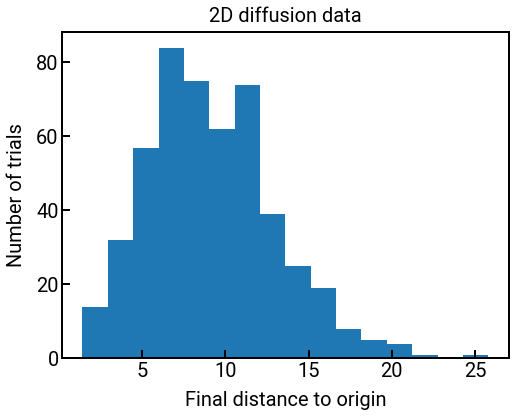

In [11]:
data = np.load('../../assets/data/week_1/01/lattice_diffusion.npy')
distances = np.linalg.norm(data, axis=2)    # compute distances to origin
final_dists = distances[:, -1]              # get all final distances to origin

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(final_dists, bins=16)
ax.tick_params(labelsize=FONTSIZE)
ax.set_xlabel('Final distance to origin', fontsize=FONTSIZE)
ax.set_ylabel('Number of trials', fontsize=FONTSIZE)
ax.set_title('2D diffusion data', fontsize=FONTSIZE)
plt.show()
fig.savefig('../../assets/fig/week_1/03/histogram.png', dpi=300, bbox_inches='tight', transparent=False)

### Saving your work!

You may have noticed that in the last line above we snuck in the [`fig.savefig()`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.savefig) method to demonstrate its usage.
Recall that a `Figure` includes all plot elements, which is why `savefig()` is called from that object as opposed to the `Axes` object (one `Figure` can have multiple `Axes`, as we'll show in the next lesson).
This method is quite powerful, but for most cases, you will only need the following four arguments:

1. `fname`: The first argument should be the path to the filename you want to save it as, _including the extension_. 
Possible extensions include `eps`, `jpg`, `png`, `pdf`, `svg`, `tif`, among others.
1. `dpi`: This is short for "dots per inch," and controls the resolution of your figure, more or less. 
We recommend a DPI of **at least 300** for all plots, which is the minimum enforced by top-tier scientific journals.
1. `bbox_inches`: This setting controls the bounding box for your figure.
`tight` is generally a good setting for auto-adjustment.
1. `transparent`: This determines whether `Axes` patches (background) will be transparent or not.
`False` means a solid white background, while `True` might be nice if your figure is placed in a setting with a colored background.

### Heatmap

**Heatmaps** are very useful for quickly identifying associations between pairs of variables arranged on a grid.
These associations can be many things, and the one we will focus on in this example is the **Pearson correlation coefficient** ($r$).
This statistical quantity measures the linear correlation between two sets of data, computed as the _covariance_ of two variables divided by the product of their _standard deviations_.
Mathematically, for two random variables $X$ and $Y$, this is expressed as:

$$ r_{X,Y} = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}, \quad r \in [-1, +1] $$

For our case when we're dealing with a sample of data points given as $\{(x_1, y_1), \dots, (x_n, y_n)\}$, it is given by:

$$ r_{xy} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}} \tag{1} $$

Visually, the Pearson correlation coefficient demonstrates the following behaviors (the line is fictitious and meant to help guide the eye):

![Pearson](../../assets/fig/week_1/03/pearson.png)

#### pandas to the rescue!

When doing exploratory data analysis (EDA) for your data, it is a very good idea to visualize the correlations between different variables as a heatmap to see if there are any expected or unexpected trends.
Luckily for us, we do not have to compute Eq. 1 by hand, which would be very annoying when we're trying to compute pairwise correlations for every possible pair between dozens of variables.
Instead, we can take advantage of a built-in method from pandas, [`df.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html), which computes the pairwise correlation of all the numerical columns and returns a **matrix** of correlations.

We can then [use matplotlib to create our heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) using the [`ax.imshow(X)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) method, where `X` is a matrix of values.
With some clever styling, we can even get labels and numbers to appear.
We'll demonstrate this below with some elemental data that we saw previously.

Correlation matrix has dimensions (3, 3).


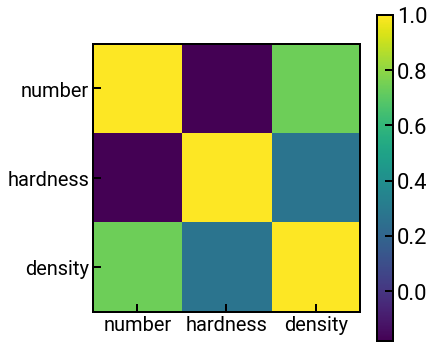

In [13]:
df = pd.read_csv('../../assets/data/week_1/02/hardness_density.csv', skiprows=1,
                 header=0, names=['element', 'number', 'hardness', 'density'])
corr = df.corr()
print(f'Correlation matrix has dimensions {corr.shape}.')

fig, ax = plt.subplots(figsize=(6, 6))
h = ax.imshow(corr)
plt.colorbar(h)
ax.set_xticks(np.arange(len(corr)))                 # we say exactly where we want ticks to appear
ax.set_xticklabels(corr.index, fontsize=FONTSIZE)   # and what their labels should be
ax.set_yticks(np.arange(len(corr)))
ax.set_yticklabels(corr.index, fontsize=FONTSIZE)
plt.show()

### Exercise: hmm... it's not very clear what values the colors correspond to. Can you add a colorbar?


What correlations do we see?

## Conclusion

This concludes our introduction to data visualization! 📊📈
For a 1-page summary of this information and more, you can check out the [cheatsheet](https://raw.githubusercontent.com/matplotlib/cheatsheets/master/cheatsheets-1.png) made by the developers of matplotlib.

Up next, we'll discuss some **common pitfalls and best practices** when it comes to making visualizations.
In the meantime, feel free to explore more on your own and let us know if you have any questions.